In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing / manipulation

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# métricas
import  sklearn.metrics  as  metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
workdir_path = '/content/drive/MyDrive/datasets'
os.chdir(workdir_path)
!ls

AP_cap.png  AP_drop.png  boxplot_origin.png  sinascrj19.csv


In [4]:
sinasc19 = pd.read_csv('sinascrj19.csv')
print(sinasc19.shape)

(207989, 61)


In [5]:
# Exclusão de variáveis sem nulas ou sem relação com o objeto
sinasc19 = sinasc19.drop(columns=['ORIGEM', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPNASCASSI',
                                  'DTCADASTRO', 'CODMUNNASC'], axis=1)

Correlação das features numéricas com o resultado em ordem crescente
PESO          1.000000
SEMAGESTAC    0.557292
GESTACAO      0.491645
TPROBSON      0.306223
GRAVIDEZ      0.220139
SEXO          0.102392
CONSULTAS     0.093714
PARIDADE      0.081233
QTDFILVIVO    0.048973
KOTELCHUCK    0.042783
QTDPARTCES    0.039668
TPAPRESENT    0.038960
QTDGESTANT    0.034521
MESPRENAT     0.033756
LOCNASC       0.029738
CODMUNNATU    0.025987
NATURALMAE    0.025974
CODUFNATU     0.025974
SERIESCMAE    0.024737
CONSPRENAT    0.022569
IDADEMAE      0.021956
QTDFILMORT    0.019944
QTDPARTNOR    0.017314
STTRABPART    0.016541
TPDOCRESP     0.015421
CODESTAB      0.011005
TPMETESTIM    0.010361
PARTO         0.010081
IDANOMAL      0.009568
CONTADOR      0.009247
IDADEPAI      0.008633
CODMUNRES     0.008401
RACACORMAE    0.008341
RACACOR       0.008340
ESCMAE        0.007794
ESTCIVMAE     0.007324
DTDECLARAC    0.004126
CODOCUPMAE    0.003993
TPFUNCRESP    0.003858
HORANASC      0.003795
NUMEROLOTE 

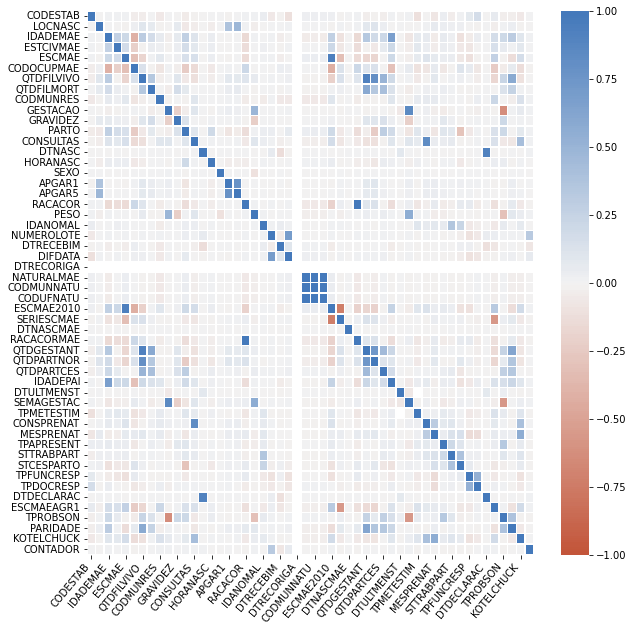

In [6]:
sinasc19['PESO'] = sinasc19['PESO'].astype('category').cat.codes

sinasc_corr = sinasc19.corr()
corr_values = sinasc_corr['PESO'].sort_values(ascending=False)
corr_values = abs(corr_values).sort_values(ascending=False)

print('Correlação das features numéricas com o resultado em ordem crescente')
print(abs(corr_values).sort_values(ascending=False))

corr4 = sinasc19.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr4,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 250, n=200),
    square=False,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

In [7]:
'''sinasc19 = sinasc19.drop(columns=['STTRABPART', 'QTDFILMORT',
                                  'QTDPARTNOR', 'TPMETESTIM', 'TPDOCRESP', 'CODESTAB', 'PARTO' ], axis=1)'''


sinasc19 = sinasc19.drop(columns=['IDANOMAL', 'CONTADOR', 'IDADEPAI', 'CODMUNRES','RACACORMAE', 'RACACOR',
                                  'ESCMAE', 'ESTCIVMAE', 'DTDECLARAC', 'HORANASC',
                                  'NUMEROLOTE', 'ESCMAE2010', 'DTNASC','APGAR1', 'ESCMAEAGR1',
                                  'CODOCUPMAE', 'DIFDATA', 'STCESPARTO', 'TPFUNCRESP',
                                  'DTNASCMAE', 'DTRECEBIM', 'APGAR5', 'DTULTMENST', 'DTRECORIGA'], axis=1)

'''
sinasc19 = sinasc19.drop(columns=['DTRECORIGA', 'HORANASC', 'DTNASCMAE', 'IDANOMAL', 'DTRECEBIM',
                                  'STTRABPART', 'DTDECLARAC', 'DTULTMENST', 'DTNASC', 'QTDFILMORT',
                                  'QTDPARTNOR', 'CODOCUPMAE', 'CONTADOR', 'TPMETESTIM', 'ESCMAEAGR1',
                                  'ESTCIVMAE', 'IDADEPAI', 'STCESPARTO'], axis=1)

sinasc19 = sinasc19.drop(columns=['QTDPARTNOR', 'QTDFILMORT', 'STTRABPART',
                                  'TPDOCRESP', 'CODESTAB', 'TPMETESTIM', 'PARTO'], axis=1)

sinasc19 = sinasc19.drop(columns=['KOTELCHUCK', 'QTDPARTCES', 'TPAPRESENT', 'QTDGESTANT',
                                  'MESPRENAT', 'LOCNASC', 'CODMUNNATU','CODUFNATU',
                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)

sinasc19 = sinasc19.drop(columns=['LOCNASC', 'CODMUNNATU','CODUFNATU',
                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)'''

"\nsinasc19 = sinasc19.drop(columns=['DTRECORIGA', 'HORANASC', 'DTNASCMAE', 'IDANOMAL', 'DTRECEBIM',\n                                  'STTRABPART', 'DTDECLARAC', 'DTULTMENST', 'DTNASC', 'QTDFILMORT',\n                                  'QTDPARTNOR', 'CODOCUPMAE', 'CONTADOR', 'TPMETESTIM', 'ESCMAEAGR1',\n                                  'ESTCIVMAE', 'IDADEPAI', 'STCESPARTO'], axis=1)\n\nsinasc19 = sinasc19.drop(columns=['QTDPARTNOR', 'QTDFILMORT', 'STTRABPART',\n                                  'TPDOCRESP', 'CODESTAB', 'TPMETESTIM', 'PARTO'], axis=1)\n\nsinasc19 = sinasc19.drop(columns=['KOTELCHUCK', 'QTDPARTCES', 'TPAPRESENT', 'QTDGESTANT',\n                                  'MESPRENAT', 'LOCNASC', 'CODMUNNATU','CODUFNATU',\n                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)\n\nsinasc19 = sinasc19.drop(columns=['LOCNASC', 'CODMUNNATU','CODUFNATU',\n                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


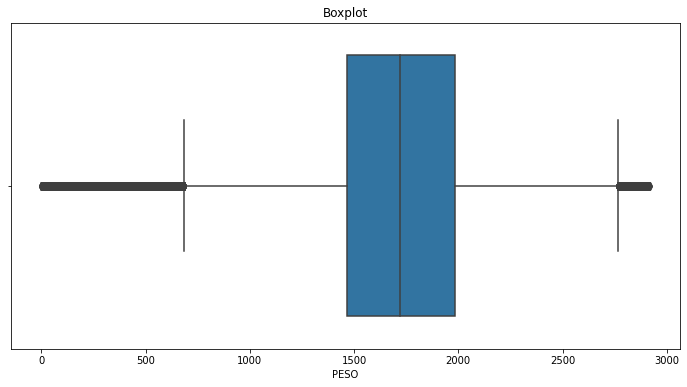

In [8]:
fig2, ax2 = plt.subplots(figsize=(12,6))
fig2 = sns.boxplot(sinasc19.PESO).set_title('Boxplot')
fig2.figure.savefig('boxplot_origin.png')

In [9]:
def outliers(s):
    iqr = (np.quantile(s, 0.65))-(np.quantile(s, 0.45))
    upper_bound = np.quantile(s, 0.65)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.45)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(sinasc19.PESO)

,sub,values
0,IQR,191.000000
1,Upper Bound,2156.500000
2,Lower Bound,1392.500000
3,Sum outliers,67623.000000
4,percentage outliers,32.512777


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


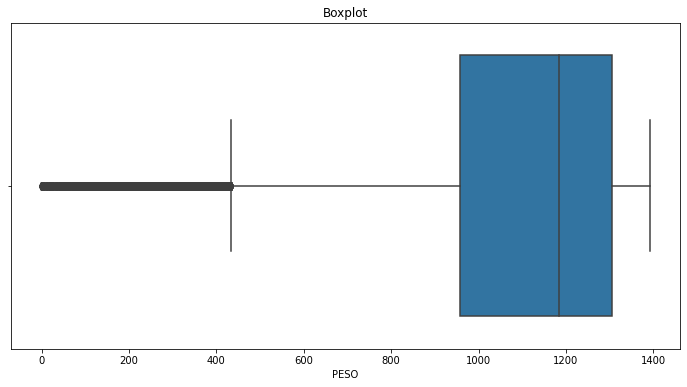

In [10]:
s = sinasc19['PESO']
iqr = (np.quantile(s, 0.65))-(np.quantile(s, 0.45))
upper_bound = np.quantile(s, 0.65)+(1.5*iqr)
lower_bound = np.quantile(s, 0.45)-(1.5*iqr)

#drop outliers
sinasc19 = sinasc19[(sinasc19['PESO'] <= upper_bound)]
sinasc19 = sinasc19[(sinasc19['PESO'] <= lower_bound)]

'''# limiting outliers
sinasc19['PESO'] = np.where(sinasc19['PESO'] > upper_bound, upper_bound,sinasc19['PESO']) #higher
sinasc19['PESO'] = np.where(sinasc19['PESO'] < lower_bound, lower_bound,sinasc19['PESO']) #lower'''


fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(sinasc19.PESO).set_title('Boxplot')
fig.figure.savefig('AP_drop.png')

In [11]:
sinasc19.shape

(41304, 30)

([<matplotlib.axis.XTick at 0x7f2311e90610>,
 [Text(0, 0, 'CODESTAB'),
  Text(0, 0, 'LOCNASC'),
  Text(0, 0, 'IDADEMAE'),
  Text(0, 0, 'QTDFILVIVO'),
  Text(0, 0, 'QTDFILMORT'),
  Text(0, 0, 'GESTACAO'),
  Text(0, 0, 'GRAVIDEZ'),
  Text(0, 0, 'PARTO'),
  Text(0, 0, 'CONSULTAS'),
  Text(0, 0, 'SEXO'),
  Text(0, 0, 'PESO'),
  Text(0, 0, 'CODANOMAL'),
  Text(0, 0, 'VERSAOSIST'),
  Text(0, 0, 'NATURALMAE'),
  Text(0, 0, 'CODMUNNATU'),
  Text(0, 0, 'CODUFNATU'),
  Text(0, 0, 'SERIESCMAE'),
  Text(0, 0, 'QTDGESTANT'),
  Text(0, 0, 'QTDPARTNOR'),
  Text(0, 0, 'QTDPARTCES'),
  Text(0, 0, 'SEMAGESTAC'),
  Text(0, 0, 'TPMETESTIM'),
  Text(0, 0, 'CONSPRENAT'),
  Text(0, 0, 'MESPRENAT'),
  Text(0, 0, 'TPAPRESENT'),
  Text(0, 0, 'STTRABPART'),
  Text(0, 0, 'TPDOCRESP'),
  Text(0, 0, 'TPROBSON'),
  Text(0, 0, 'PARIDADE'),
  Text(0, 0, 'KOTELCHUCK')])

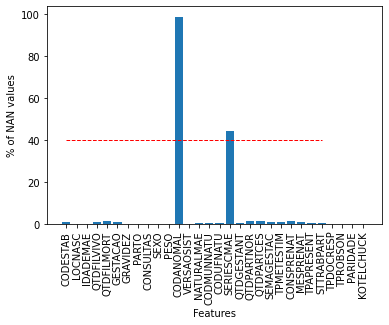

In [12]:
cat_null = sinasc19.isnull().sum()
#print(cat_null)
cat_null = cat_null/len(sinasc19)*100
cat_null = cat_null[cat_null>0]
cat_null.sort_values(inplace=True, ascending=False)
#print(cat_null)

null_cat=sinasc19.isna().sum()/len(sinasc19)*100
plt.bar(range(len(null_cat)),null_cat)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40, 40], 'r--', lw=1)
plt.xticks(list(range(len(sinasc19.columns))),list(sinasc19.columns.values),rotation='vertical')

In [13]:
for col in sinasc19.columns.values:
    if (pd.isna(sinasc19[col]).sum()) > 0: 
        if pd.isna(sinasc19[col]).sum() > (40/100 * len(sinasc19)): 
            print(col, 'removido') 
            sinasc19 = sinasc19.drop([col], axis=1) 
        elif (sinasc19[col].dtype == 'object'):
            sinasc19[col] = sinasc19[col].fillna(sinasc19[col].mode()[0])        
        else: sinasc19[col] = sinasc19[col].fillna(sinasc19[col].median())

CODANOMAL removido
SERIESCMAE removido


In [14]:
sinasc19.shape

(41304, 28)

In [15]:
sinasc19 = pd.get_dummies(sinasc19)

In [16]:
# recupera os valores (X), e as classes (Y)
X = sinasc19.drop('PESO', axis=1)
Y = sinasc19['PESO']

In [17]:
# normalização dos dados
min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)

In [18]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=26)

In [19]:
pca_train = PCA(n_components=29).fit(Xtrain)
X_trar = pca_train.transform(Xtrain)
X_train = pd.DataFrame(X_trar)

X_tear = pca_train.transform(Xtest)
X_test = pd.DataFrame(X_tear)

In [20]:
result = {}

### KNN Regressor

In [21]:
m1 = KNeighborsRegressor(n_neighbors=16,metric='euclidean')
m1.fit(X_train,y_train)

y_pred = m1.predict(X_test)

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

result['KNN'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.5102196192679993
MAE : 154.84275511439293
MSE : 43916.648744855345
RMSE: 209.56299469337458


In [22]:
# Linear Regression

m2 = LinearRegression()
m2.fit(X_train, y_train)

y_pred = m2.predict(X_test)

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

result['Linear Regression'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.5336217069983065
MAE : 150.09143213161562
MSE : 41818.2770926218
RMSE: 204.49517620868664


In [23]:
# SVM

m3 = SVR()
m3.fit(X_train, y_train)

y_pred = m3.predict(X_test)

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

result['SVM'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.4339270393808148
MAE : 162.71682274203494
MSE : 50757.49938843725
RMSE: 225.29425067772425


In [24]:
# Decision Tree

m4 = DecisionTreeRegressor(random_state=60)
m4.fit(X_train, y_train)

y_pred = m4.predict(X_test)

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

result['Decision Tree'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.1512653520601357
MAE : 195.7637896945487
MSE : 76102.64289365022
RMSE: 275.86707468208346


In [25]:
# Random Forest

m5 = RandomForestRegressor(n_estimators=200, random_state=26)
m5.fit(X_train, y_train)

y_pred = m5.predict(X_test)

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

result['Random Forest'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.5666926798812898
MAE : 144.6399280825094
MSE : 38852.93516205695
RMSE: 197.1114790215348


## Resultados

In [26]:
# Ranking final do percentual dos modelos aplicados

cm = sns.color_palette('Blues_r', as_cmap=True)
pd.DataFrame(result).T.style.background_gradient(subset=['R2'], cmap=cm).highlight_max(subset=['R2'], axis=0)

,R2,MAE,MSE,RMSE
KNN,0.510220,154.842755,43916.648745,209.562995
Linear Regression,0.533622,150.091432,41818.277093,204.495176
SVM,0.433927,162.716823,50757.499388,225.294251
Decision Tree,0.151265,195.763790,76102.642894,275.867075
Random Forest,0.566693,144.639928,38852.935162,197.111479
